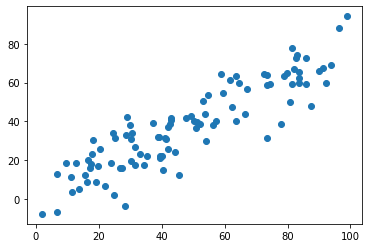

In [48]:
#看看用梯度如何实现的PCA

import numpy as np
import matplotlib.pyplot as plt

X = np.empty([100,2])
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0., 10., size=100)

plt.scatter(X[:,0],X[:,1])
plt.show()

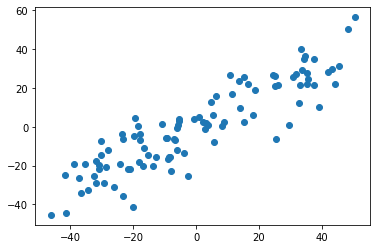

In [49]:
def demean(X):
    # axis=0按列计算均值，即每个属性的均值，1则是计算行的均值
    return (X - np.mean(X, axis=0))

X_demean = demean(X)
# 注意看数据分布没变，但是坐标已经以原点为中心了
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [50]:
def f(w,X):
    return np.sum((X.dot(w)**2))/len(X)

def df_math(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

In [51]:
def direction(w):
    return w / np.linalg.norm(w)

In [52]:
# 梯度上升法代码
def gradient_ascent( X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df_math(w,X)
        last_w = w
        w = last_w + eta * gradient
        w = direction(w)    # 将w转换成单位向量
        if (abs(f(w,X) - f(last_w,X)) < epsilon):
            break
        cur_iter += 1
    return w

In [53]:
initial_w = np.random.random(X.shape[1])
eta = 0.001
w = gradient_ascent( X_demean, initial_w, eta)

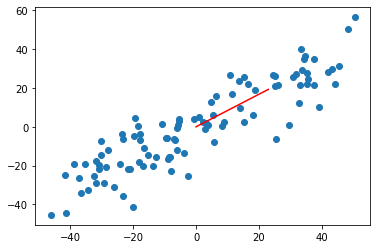

In [54]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30], color='red')
plt.show()